# **1. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [1]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split



# **2. Memuat Dataset dari Hasil Clustering**

Memuat dataset hasil clustering dari file CSV ke dalam variabel DataFrame.

In [2]:
data_with_cluster = pd.read_csv("processed_data_with_label.csv")


X = data_with_cluster.drop(columns=['cluster'])  
y = data_with_cluster['cluster'] 


# **3. Data Splitting**

Tahap Data Splitting bertujuan untuk memisahkan dataset menjadi dua bagian: data latih (training set) dan data uji (test set).

In [3]:
#membagi data dengan proporsi 80% data train dan 20% data test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# **4. Membangun Model Klasifikasi**


## **a. Membangun Model Klasifikasi**

Setelah memilih algoritma klasifikasi yang sesuai, langkah selanjutnya adalah melatih model menggunakan data latih.

Berikut adalah rekomendasi tahapannya.
1. Pilih algoritma klasifikasi yang sesuai, seperti Logistic Regression, Decision Tree, Random Forest, atau K-Nearest Neighbors (KNN).
2. Latih model menggunakan data latih.

### Model Random Forest

In [4]:
rf_model = RandomForestClassifier(
    n_estimators=1000,          
    max_depth=10,               
    min_samples_split=10,       
    min_samples_leaf=5,         
    max_features='sqrt',        
    class_weight='balanced',
    random_state=42,                
)

rf_model.fit(X_train, y_train)



RandomForestClassifier(class_weight='balanced', max_depth=10,
                       min_samples_leaf=5, min_samples_split=10,
                       n_estimators=1000, random_state=42)

Model Random Forest yang saya bangun menggunakan 1000 pohon keputusan untuk meningkatkan akurasi. Saya mengatur kedalaman pohon maksimal 10, dengan minimal 10 sampel untuk membagi node dan 5 sampel di setiap daun, guna menghindari overfitting. Parameter max_features='sqrt' digunakan untuk mempercepat pelatihan, dan class_weight='balanced' untuk menangani ketidakseimbangan kelas.

### Model Logistic Regression

In [5]:
lr_model = LogisticRegression(
    C=0.0000001,  
    penalty='l2',
    solver='lbfgs',
    max_iter=10000,
    class_weight='balanced',
    random_state=42
)

lr_model.fit(X_train, y_train)


LogisticRegression(C=1e-07, class_weight='balanced', max_iter=10000,
                   random_state=42)

Model Logistic Regression yang saya bangun menggunakan parameter C 0.0000001 untuk menghindari overfitting dengan memberikan regularisasi. Saya memilih penalti 'l2' untuk menjaga kestabilan model, serta solver 'lbfgs' untuk optimasi. Model ini diatur untuk melakukan maksimal 10.000 iterasi, dan menggunakan class_weight='balanced' untuk menangani ketidakseimbangan kelas.

## **b. Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Lakukan prediksi menggunakan data uji.
2. Hitung metrik evaluasi seperti Accuracy dan F1-Score (Opsional: Precision dan Recall).
3. Buat confusion matrix untuk melihat detail prediksi benar dan salah.

Tulis hasil evaluasi algoritma yang digunakan, jika Anda menggunakan 2 algoritma, maka bandingkan hasilnya.

### Model Random Forest

In [6]:
y_pred_rf = rf_model.predict(X_test)

accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Akurasi Random Forest:", accuracy_rf)
print( classification_report(y_test, y_pred_rf))

Akurasi Random Forest: 0.9700460829493087
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       218
           1       0.97      1.00      0.98       269
           2       1.00      0.86      0.92       368
           3       1.00      1.00      1.00       221
           4       0.90      1.00      0.95       256
           5       0.96      1.00      0.98       215
           6       0.98      1.00      0.99       189

    accuracy                           0.97      1736
   macro avg       0.97      0.98      0.97      1736
weighted avg       0.97      0.97      0.97      1736



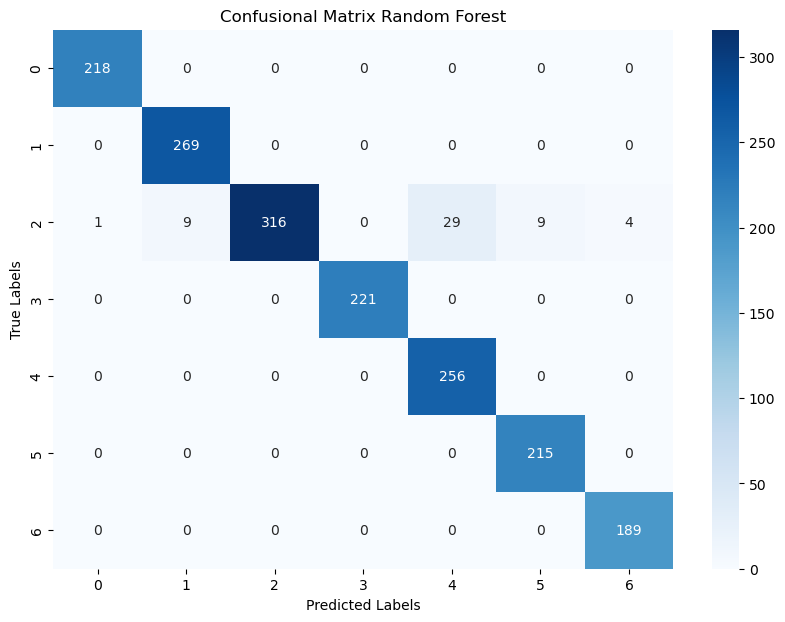

In [7]:
cm = confusion_matrix(y_test, y_pred_rf)


plt.figure(figsize=(10, 7))
sns.heatmap(
    cm, 
    annot=True,                
    fmt='d',                   
    cmap='Blues',              
    xticklabels=np.unique(y),  
    yticklabels=np.unique(y)   
)

plt.title("Confusional Matrix Random Forest")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()


### Model Logistic Regression

In [11]:
y_pred_lr = lr_model.predict(X_test)
accuracy_lr = accuracy_score(y_test, y_pred_lr)

print(f"Akurasi Logistic Regression: {accuracy_lr}")
print( classification_report(y_test, y_pred_lr))

Akurasi Logistic Regression: 0.9158986175115207
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       218
           1       0.67      1.00      0.81       269
           2       1.00      0.60      0.75       368
           3       0.93      1.00      0.97       221
           4       1.00      1.00      1.00       256
           5       1.00      1.00      1.00       215
           6       1.00      1.00      1.00       189

    accuracy                           0.92      1736
   macro avg       0.94      0.94      0.93      1736
weighted avg       0.94      0.92      0.91      1736



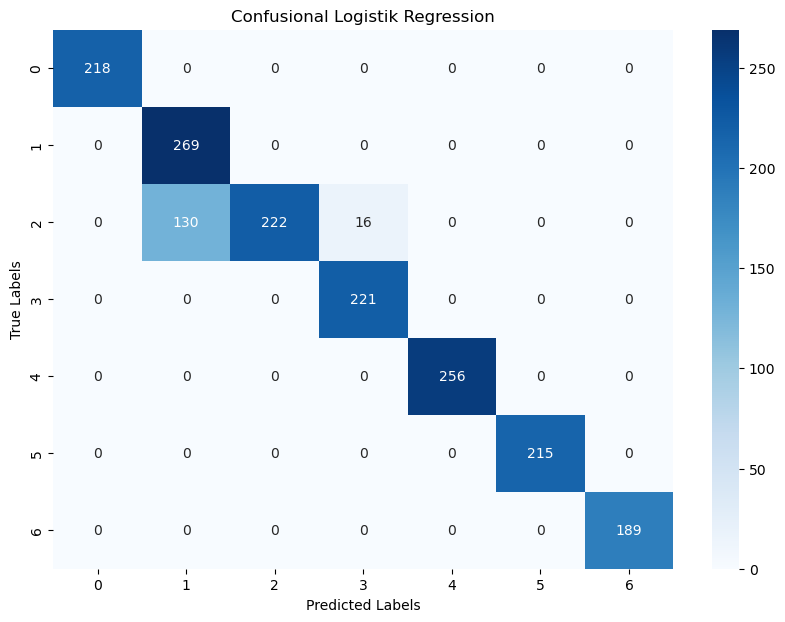

In [10]:
cm = confusion_matrix(y_test, y_pred_lr)


plt.figure(figsize=(10, 7))
sns.heatmap(
    cm, 
    annot=True,                
    fmt='d',                   
    cmap='Blues',              
    xticklabels=np.unique(y),  
    yticklabels=np.unique(y)   
)

plt.title("Confusional Logistik Regression")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()


## **e. Analisis Hasil Evaluasi Model Klasifikasi**

Random Forest :
- Akurasi: 97.00%, lebih tinggi dibandingkan Logistic Regression.
- Precision dan Recall: Secara umum, precision, recall, dan f1-score sangat baik di semua kelas.
- Kelas 2 menunjukkan peningkatan signifikan dibanding Logistic Regression, dengan precision yang sempurna (1.00) dan recall yang lebih tinggi (0.86).
- Performa untuk kelas lainnya hampir mendekati sempurna, menunjukkan bahwa Random Forest mampu menangani distribusi data dengan baik.
- Kelebihan: Random Forest secara konsisten menghasilkan performa yang sangat tinggi di semua kelas.
- Kelemahan: Memiliki kompleksitas yang lebih tinggi dibanding Logistic Regression.

Logistic Regression :
- Akurasi: 91.59%, menunjukkan performa yang cukup baik dalam klasifikasi.
- Precision dan Recall: Precision rata-rata tinggi, tetapi ada kelemahan signifikan pada kelas 1 dan 2, di mana recall dan f1-score untuk kelas 2 lebih rendah (recall: 0.60). Ini menunjukkan bahwa model kesulitan mengklasifikasikan beberapa sampel kelas 2 secara benar.
- Recall untuk kelas 1 mencapai 1.00, tetapi precision untuk kelas ini lebih rendah (0.67), artinya model cenderung overpredict kelas ini.
- Kelebihan: Model sederhana dan memiliki performa yang baik secara keseluruhan.
- Kelemahan: Kurang optimal dalam menangani beberapa kelas, khususnya kelas minoritas.

Kesimpulan
- Secara keseluruhan model Random Forest  memiliki tingkat kesalahan yang lebih kecil dibandingkan model Logistic Regression.
- Pada confusion matrix Logistic Regression, cluster 1 menunjukkan distribusi kesalahan yang lebih tinggi
- Model Random Forest lebih stabil karena distribusi kesalahan lebih rendah, sementara yang model Logistic Regression lebih cenderung mengelompokkan cluster dengan baik tetapi menghasilkan lebih banyak kesalahan pada cluster lainnya.